# CNN 变体网络

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

2.0.0-beta0


## 载入数据

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape((-1,28,28,1))
x_test = x_test.reshape((-1,28,28,1))
print(x_train.shape, ' ', y_train.shape)
print(x_test.shape, ' ', y_test.shape)

(60000, 28, 28, 1)   (60000,)
(10000, 28, 28, 1)   (10000,)


## 简单的深度网络

![AlexNet & VGGNet](images/AlexNet_VGGNet.jpg)

In [3]:
x_shape  = x_train.shape
deep_model = keras.Sequential(
[
    layers.Conv2D(input_shape=((x_shape[1], x_shape[2], x_shape[3])),
                 filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax')
    
])

In [4]:
deep_model.compile(optimizer=keras.optimizers.Adam(),
             loss=keras.losses.SparseCategoricalCrossentropy(),
            metrics=['accuracy'])
deep_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0

In [5]:
history = deep_model.fit(x_train, y_train, batch_size=64, epochs=5, validation_split=0.1)

W0908 01:14:24.348387  3972 deprecation.py:323] From C:\Users\44310\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 5s 94us/sample - loss: 0.2476 - accuracy: 0.9331 - val_loss: 0.0629 - val_accuracy: 0.9820
Epoch 2/5
54000/54000 [==============================] - 3s 59us/sample - loss: 0.0607 - accuracy: 0.9813 - val_loss: 0.0374 - val_accuracy: 0.9888
Epoch 3/5
54000/54000 [==============================] - 3s 58us/sample - loss: 0.0414 - accuracy: 0.9867 - val_loss: 0.0400 - val_accuracy: 0.9870
Epoch 4/5
54000/54000 [==============================] - 3s 59us/sample - loss: 0.0344 - accuracy: 0.9890 - val_loss: 0.0426 - val_accuracy: 0.9872
Epoch 5/5
54000/54000 [==============================] - 3s 59us/sample - loss: 0.0300 - accuracy: 0.9907 - val_loss: 0.0429 - val_accuracy: 0.9873


In [6]:
deep_model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 45us/sample - loss: 0.0398 - accuracy: 0.9857


[0.0397556545455649, 0.9857]

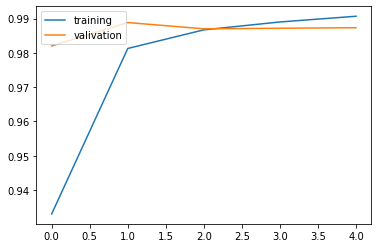

In [7]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'valivation'], loc='upper left')
plt.show()

## 添加了其它功能层的深度卷积

In [8]:
x_shape  = x_train.shape
deep_model = keras.Sequential(
[
    layers.Conv2D(input_shape=((x_shape[1], x_shape[2], x_shape[3])),
                 filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.BatchNormalization(),
    layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
    
])

In [9]:
deep_model.compile(optimizer=keras.optimizers.Adam(),
             loss=keras.losses.SparseCategoricalCrossentropy(),
            metrics=['accuracy'])
deep_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 32)       

In [10]:
history = deep_model.fit(x_train, y_train, batch_size=64, epochs=5, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 8s 157us/sample - loss: 0.2993 - accuracy: 0.9035 - val_loss: 0.0469 - val_accuracy: 0.9865
Epoch 2/5
54000/54000 [==============================] - 8s 141us/sample - loss: 0.1162 - accuracy: 0.9632 - val_loss: 0.0502 - val_accuracy: 0.9860
Epoch 3/5
54000/54000 [==============================] - 8s 140us/sample - loss: 0.0852 - accuracy: 0.9726 - val_loss: 0.0343 - val_accuracy: 0.9910
Epoch 4/5
54000/54000 [==============================] - 8s 140us/sample - loss: 0.0700 - accuracy: 0.9777 - val_loss: 0.0438 - val_accuracy: 0.9885
Epoch 5/5
54000/54000 [==============================] - 7s 139us/sample - loss: 0.0628 - accuracy: 0.9801 - val_loss: 0.0330 - val_accuracy: 0.9918


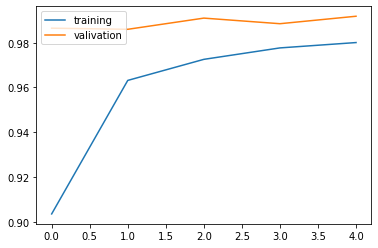

In [11]:
%matplotlib inline
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'valivation'], loc='upper left')
plt.show()

In [12]:
deep_model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 75us/sample - loss: 0.0292 - accuracy: 0.9906


[0.029159733899943967, 0.9906]

## NIN 网络

Min等人在 2013年 [Network In Network](https://arxiv.org/abs/1312.4400) 提出了减少模型中参数数量的方法之一 即“网络中的网络（NIN）”或“1X1卷积” 方法很简单 - 在其他卷积层之后添加卷积层 具有降低图像空间的维度（深度）的效果，有效地减少了参数的数量
![NIN](images/NIN.gif)
GoogleNet 中就用到了 NIN 结构

In [13]:
x_shape  = x_train.shape
deep_model = keras.Sequential(
[
    layers.Conv2D(input_shape=((x_shape[1], x_shape[2], x_shape[3])),
                 filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(filters=16, kernel_size=(1,1), strides=(1,1), padding='valid', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(filters=16, kernel_size=(1,1), strides=(1,1), padding='valid', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
    
])

In [14]:
deep_model.compile(optimizer=keras.optimizers.Adam(),
             loss=keras.losses.SparseCategoricalCrossentropy(),
            metrics=['accuracy'])
deep_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_4 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 16)        528       
_________________________________________________________________
batch_normalization_5 (Batch (None, 28, 28, 16)        64        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 32)        4640      
_________________________________________________________________
batch_normalization_6 (Batch (None, 14, 14, 32)       

In [15]:
history = deep_model.fit(x_train, y_train, batch_size=64, epochs=5, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 8s 140us/sample - loss: 0.2831 - accuracy: 0.9118 - val_loss: 0.0511 - val_accuracy: 0.9853
Epoch 2/5
54000/54000 [==============================] - 7s 124us/sample - loss: 0.0841 - accuracy: 0.9750 - val_loss: 0.0436 - val_accuracy: 0.9882
Epoch 3/5
54000/54000 [==============================] - 7s 124us/sample - loss: 0.0622 - accuracy: 0.9814 - val_loss: 0.0381 - val_accuracy: 0.9905
Epoch 4/5
54000/54000 [==============================] - 7s 124us/sample - loss: 0.0522 - accuracy: 0.9843 - val_loss: 0.0418 - val_accuracy: 0.9895
Epoch 5/5
54000/54000 [==============================] - 7s 123us/sample - loss: 0.0431 - accuracy: 0.9864 - val_loss: 0.0548 - val_accuracy: 0.9873


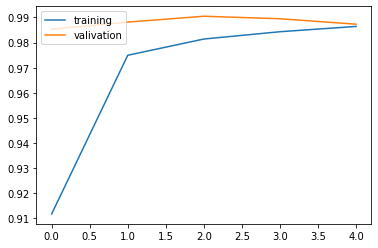

In [16]:
%matplotlib inline
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'valivation'], loc='upper left')
plt.show()

In [17]:
deep_model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 69us/sample - loss: 0.0411 - accuracy: 0.9861


[0.041092515085663764, 0.9861]